Step 1: Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

Step 2: Load Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Step 3: Basic Information

In [12]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


The dataset contains 8,807 titles and 12 features, including both movies and TV shows.
Some columns contain missing values, especially director, country, and cast.

Step 4: Check Missing Values

In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


The director column has the highest number of missing values (2,634).
The country and cast columns also contain a significant number of missing values.

Step 5: Data Cleaning

In [16]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

In [17]:
df["date_added"].isnull().sum()

np.int64(98)

In [18]:
df["director"].fillna("Unknown", inplace=True)
df["cast"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)

/tmp/ipython-input-161/1771064175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna("Unknown", inplace=True)
/tmp/ipython-input-161/1771064175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

**Visualizations**
1 Distribution of Content Type

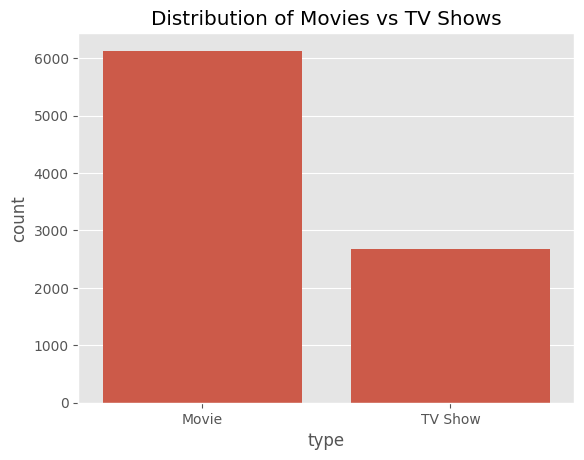

In [19]:
sns.countplot(data=df, x="type")
plt.title("Distribution of Movies vs TV Shows")
plt.show()

Movies (6,131) are significantly more common than TV Shows (2,676) on Netflix.

2 Top 10 Countries

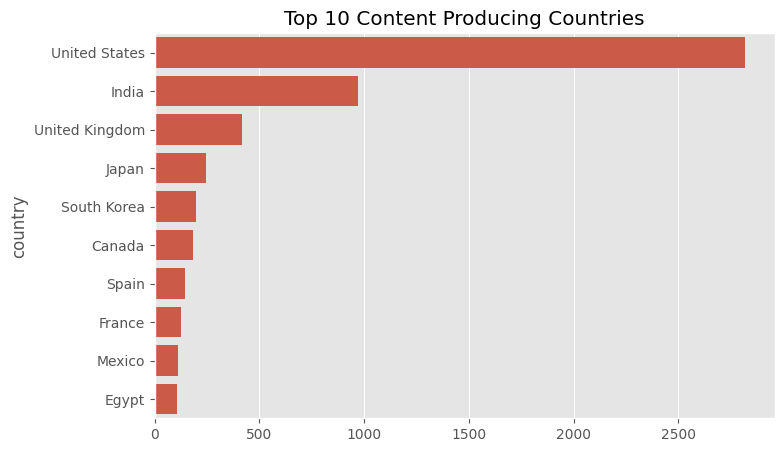

In [5]:
top_countries = df["country"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countries")
plt.show()

The United States produces the highest number of titles (3,689), followed by India (1,046) and the United Kingdom (804).

3 Release Year Trend

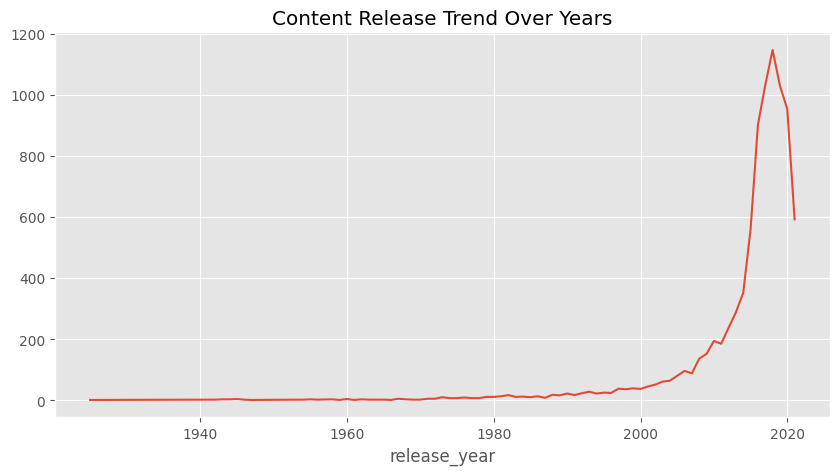

In [6]:
plt.figure(figsize=(10,5))
df["release_year"].value_counts().sort_index().plot()
plt.title("Content Release Trend Over Years")
plt.show()

Content production increased rapidly after 2015, showing strong growth in recent years.

4 Ratings Distribution

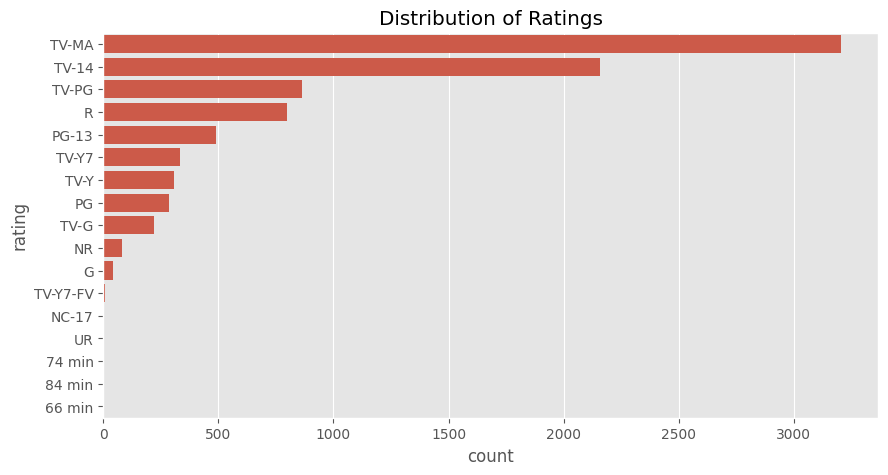

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="rating", order=df["rating"].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()

TV-MA is the most common rating (3,207 titles), followed by TV-14 (2,160).

5 Correlation Matrix

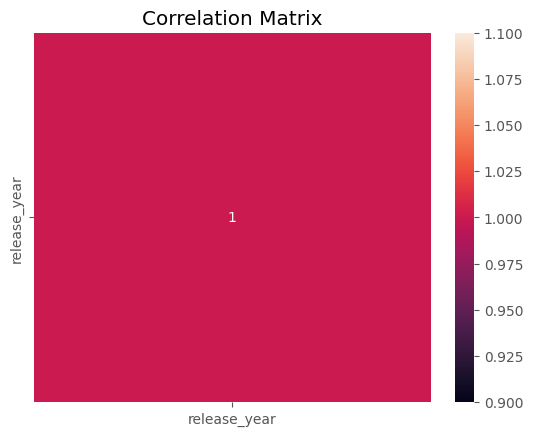

In [20]:
numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

6 Time-Based Analysis

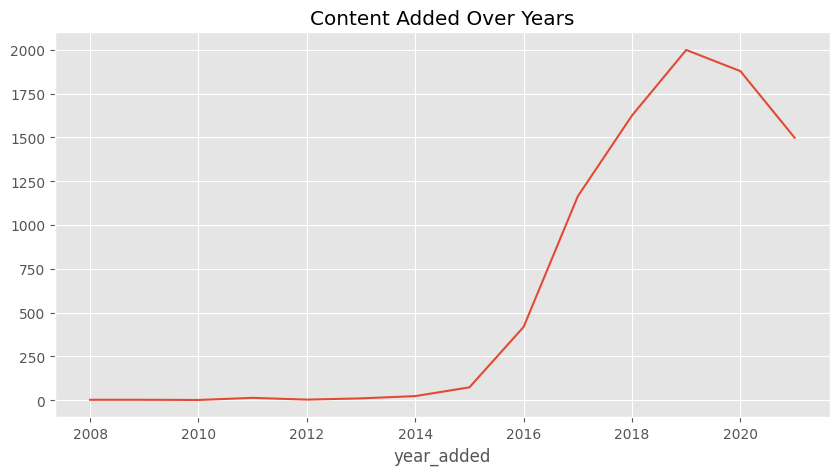

In [21]:
df["year_added"] = df["date_added"].dt.year

plt.figure(figsize=(10,5))
df["year_added"].value_counts().sort_index().plot()
plt.title("Content Added Over Years")
plt.show()

The number of titles added to Netflix increased significantly after 2016, peaking around 2019.

**Key Insights**
1. The dataset contains 8,807 titles.

2. Movies (6,131) are more common than TV Shows (2,676).

3. The United States is the leading content producer.

4. TV-MA is the most frequent rating category.

5. Content addition increased significantly after 2016 and peaked around 2019.